In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np

from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from xgboost import XGBClassifier

In [ ]:
df = pd.read_excel('HealthCareData.xlsx')
df.head()


,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [ ]:
df.shape

(950, 42)

In [ ]:
df.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),True
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [ ]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [ ]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

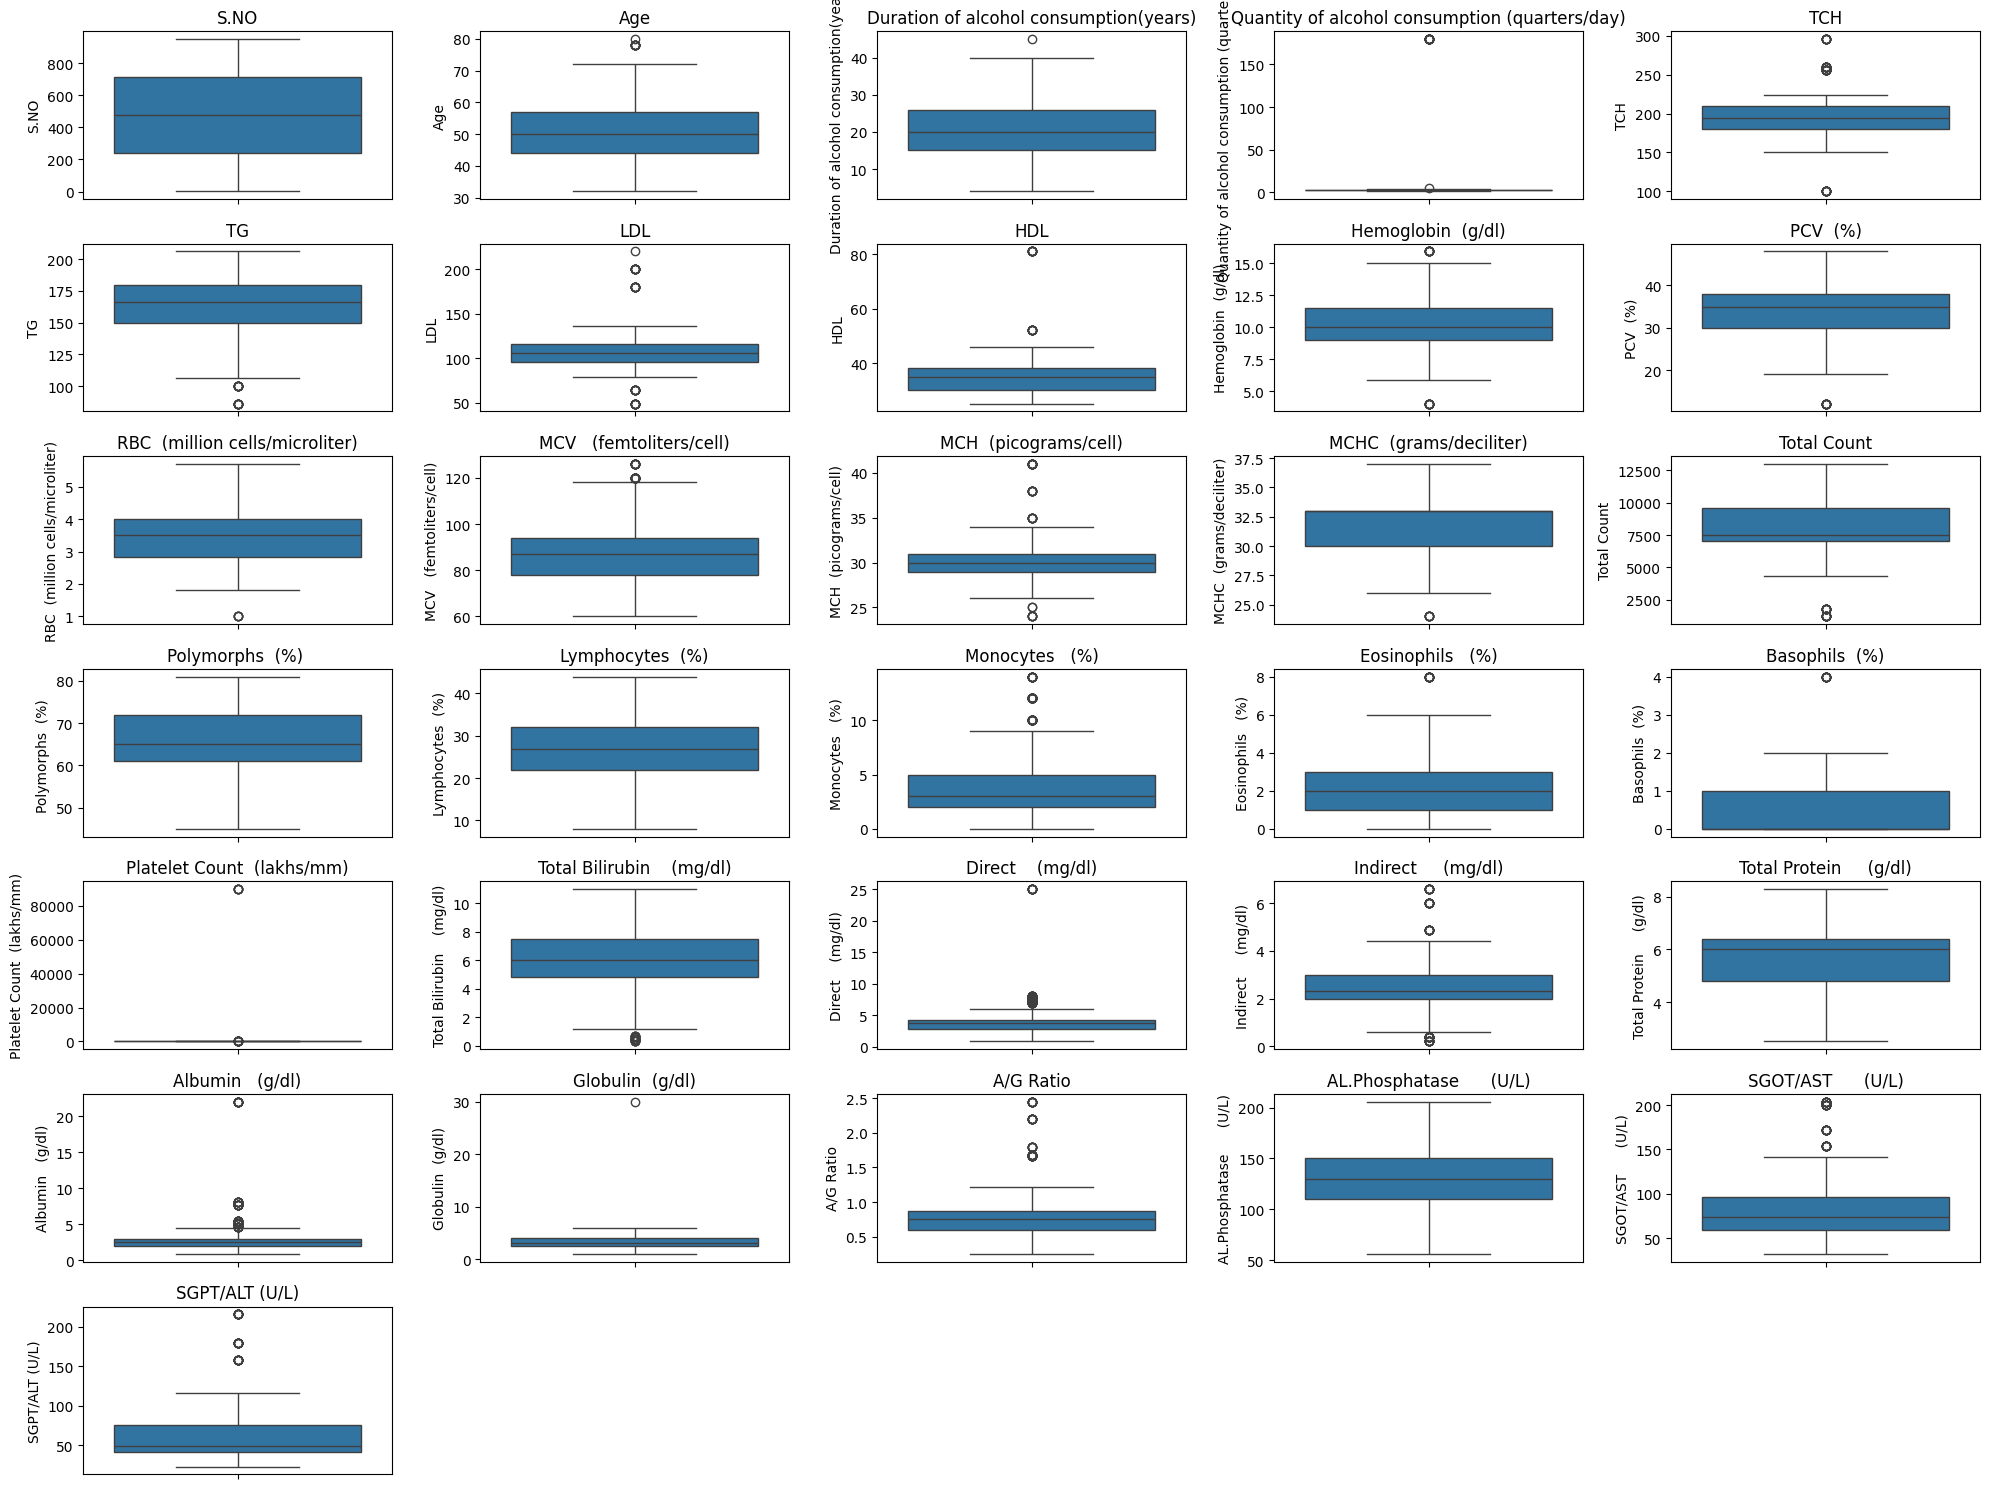

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

c = 0
plt.figure(figsize=(20, 15))

for i in df.columns:
    try:
        col_numeric = pd.to_numeric(df[i], errors='coerce')
        if col_numeric.notna().sum() > 0:
            plt.subplot(7, 5, c + 1)
            sns.boxplot(y=col_numeric)
            plt.title(i)
            c += 1
    except Exception as e:
        print(f"Skipping column {i} due to error: {e}")

plt.tight_layout()
plt.show()

['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)', 'Duration of alcohol consumption(years)', 'Quantity of alcohol consumption (quarters/day)', 'Type of alcohol consumed', 'Hepatitis B infection', 'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)', 'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG', 'LDL', 'HDL', 'Hemoglobin (g/dl)', 'PCV (%)', 'RBC (million cells/microliter)', 'MCV (femtoliters/cell)', 'MCH (picograms/cell)', 'MCHC (grams/deciliter)', 'Total Count', 'Polymorphs (%)', 'Lymphocytes (%)', 'Monocytes (%)', 'Eosinophils (%)', 'Basophils (%)', 'Platelet Count (lakhs/mm)', 'Total Bilirubin (mg/dl)', 'Direct (mg/dl)', 'Indirect (mg/dl)', 'Total Protein (g/dl)', 'Albumin (g/dl)', 'Globulin (g/dl)', 'A/G Ratio', 'AL.Phosphatase (U/L)', 'SGOT/AST (U/L)', 'SGPT/ALT (U/L)', 'USG Abdomen (diffuse liver or not)', 'Predicted Value(Out Come-Patient suffering from liver cirrosis or not)']


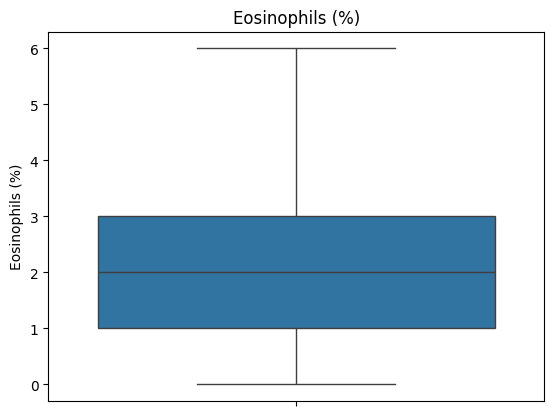

In [ ]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(r"\s+", " ", regex=True)

# Check names
print(df.columns.tolist())

# Now you can safely reference your column
col = 'Eosinophils (%)'

q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df[col] = np.where(
    df[col] > upper_limit, upper_limit,
    np.where(df[col] < lower_limit, lower_limit, df[col])
)
sns.boxplot(y=df[col])
plt.title(col)
plt.show()

In [ ]:
q1 = df['Basophils (%)'].quantile(0.25)
q3 = df['Basophils (%)'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
df['Basophils (%)'] = np.where(df['Basophils (%)'] > upper_limit, upper_limit,
                        np.where(df['Basophils (%)'] < lower_limit, lower_limit, df['Basophils (%)']))

<Axes: ylabel='Basophils (%)'>

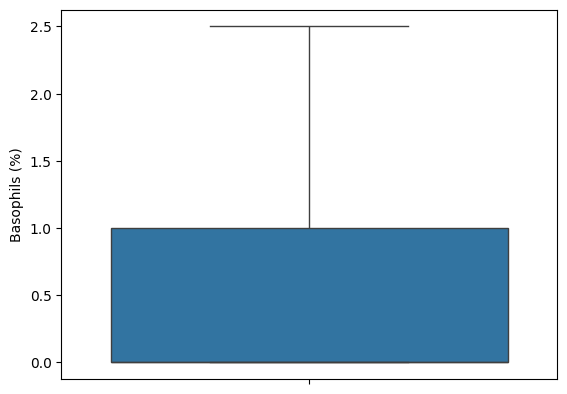

In [ ]:
sns.boxplot(df['Basophils (%)'])

<Axes: ylabel='Platelet Count (lakhs/mm)'>

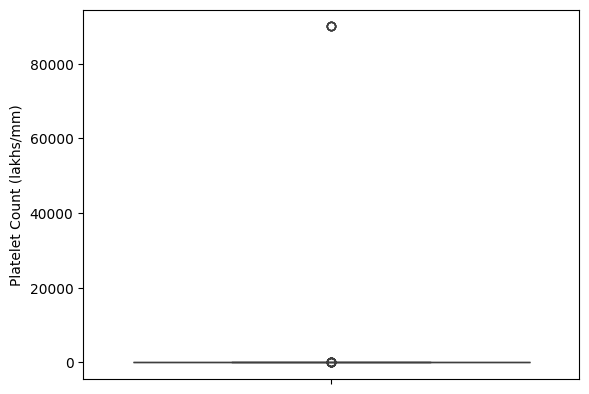

In [ ]:
sns.boxplot(df['Platelet Count (lakhs/mm)'])

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
x = df.drop('Predicted Value(Out Come-Patient suffering from liver cirrosis or not)', axis=1)
y = df['Predicted Value(Out Come-Patient suffering from liver cirrosis or not)']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
936,937,72,female,urban,4,3,branded liquor,negative,negative,NO,...,1.0,2.0,5.3,4.2,3.5,NaN,110.0,110,70,no
290,291,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
544,545,38,male,urban,24,3,both,negative,negative,NO,...,2.0,1.0,4.0,2.0,2.0,01:01:00,100.0,94,106,YES
275,276,60,female,rural,10,3,both,negative,negative,YES,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
109,110,50,male,rural,15,1,country liquor,negative,negative,YES,...,6.0,2.0,7.0,3.0,4.0,NaN,120.0,79,84,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,male,rural,20,2,country liquor,negative,negative,YES,...,7.9,3.9,5.0,2.0,3.0,NaN,110.0,86,79,YES
270,271,60,female,rural,10,3,both,Positive,Positive,YES,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
860,861,57,male,rural,25,3,both,Positive,Positive,YES,...,3.7,NaN,NaN,2.0,4.5,0.44,157.0,88,56,YES
435,436,55,female,rural,20,2,country liquor,Positive,Positive,YES,...,2.5,1.5,5.0,2.5,2.5,NaN,152.0,172,180,YES


In [ ]:
x_test

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
199,200,44,male,NaN,25,3,both,Positive,Positive,YES,...,2.5,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES
929,930,50,male,NaN,20,3,both,negative,negative,NO,...,1.2,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no
693,694,42,male,NaN,22,3,both,Positive,Positive,YES,...,3.0,3.0,3.0,1.2,1.8,02:03:00,184.0,72,40,YES
798,799,51,male,rural,25,2,country liquor,negative,negative,YES,...,25.0,2.0,4.8,22.0,2.6,NaN,145.0,64,43,YES
874,875,38,male,rural,10,3,both,Positive,Positive,YES,...,3.2,2.0,NaN,2.1,4.3,0.48,130.0,56,48,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,70,male,rural,40,1,both,Positive,Positive,NO,...,2.2,2.6,5.1,1.6,3.5,01:02:00,134.0,56,24,YES
33,34,62,male,rural,40,2,both,negative,negative,YES,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
31,32,62,male,rural,40,2,both,negative,negative,YES,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
710,711,46,male,rural,18,2,country liquor,negative,negative,YES,...,1.1,0.9,6.0,4.0,2.0,02:01:00,180.0,84,96,YES


In [ ]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
936,no
290,YES
544,YES
275,YES
109,YES
...,...
106,YES
270,YES
860,YES
435,YES


In [ ]:
y_test

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
199,YES
929,YES
693,YES
798,YES
874,YES
...,...
598,YES
33,YES
31,YES
710,YES


In [ ]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.481909,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.644771,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,2.500000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


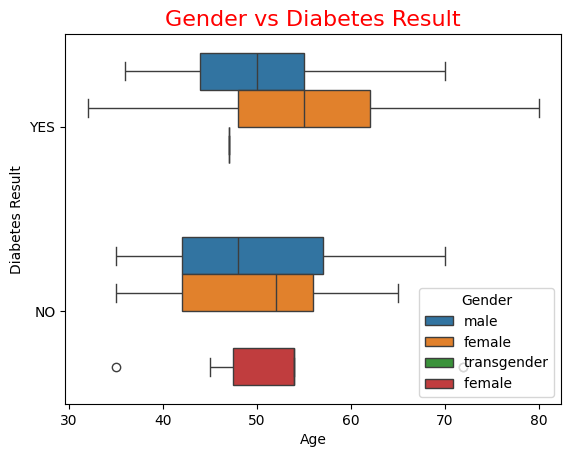

In [ ]:
sns.boxplot(x="Age", y="Diabetes Result", data=df, hue="Gender")
plt.title("Gender vs Diabetes Result", color='red', fontsize=16)
plt.show()


<Axes: xlabel='Place(location where the patient lives)', ylabel='Age'>

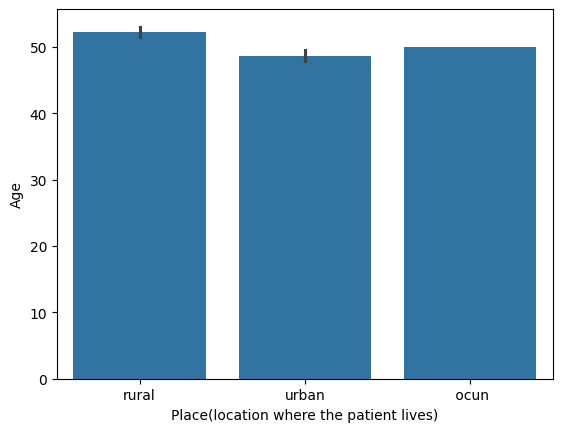

In [ ]:
sns.barplot(x=df['Place(location where the patient lives)'], y=df['Age'])

Text(0.5, 1.0, 'Place vs Age')

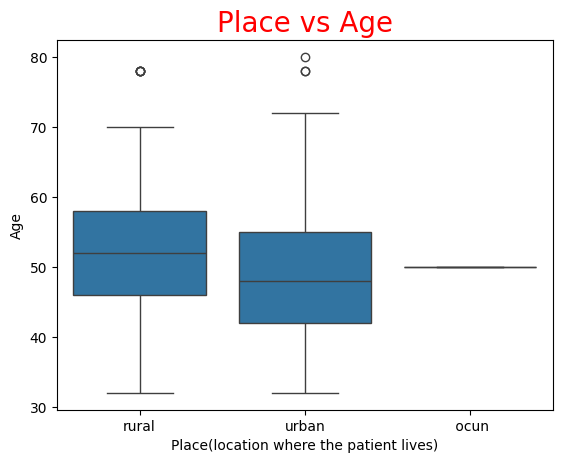

In [ ]:
sns.boxplot(x='Place(location where the patient lives)', y='Age', data=df)
plt.title('Place vs Age', color='red', size=20)

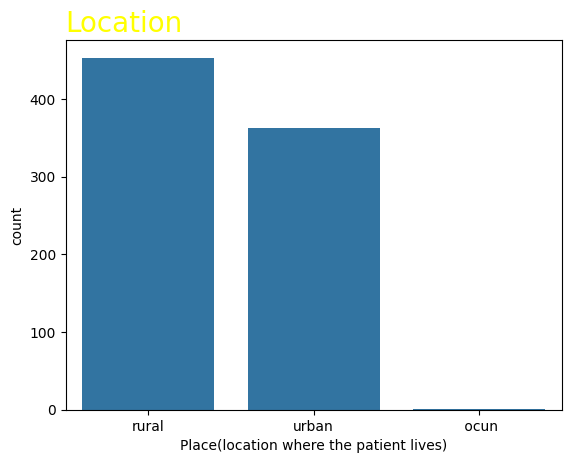

In [ ]:
sns.countplot(data=df, x='Place(location where the patient lives)')
plt.title('Location', color='yellow', size=20, loc='left')
plt.show()


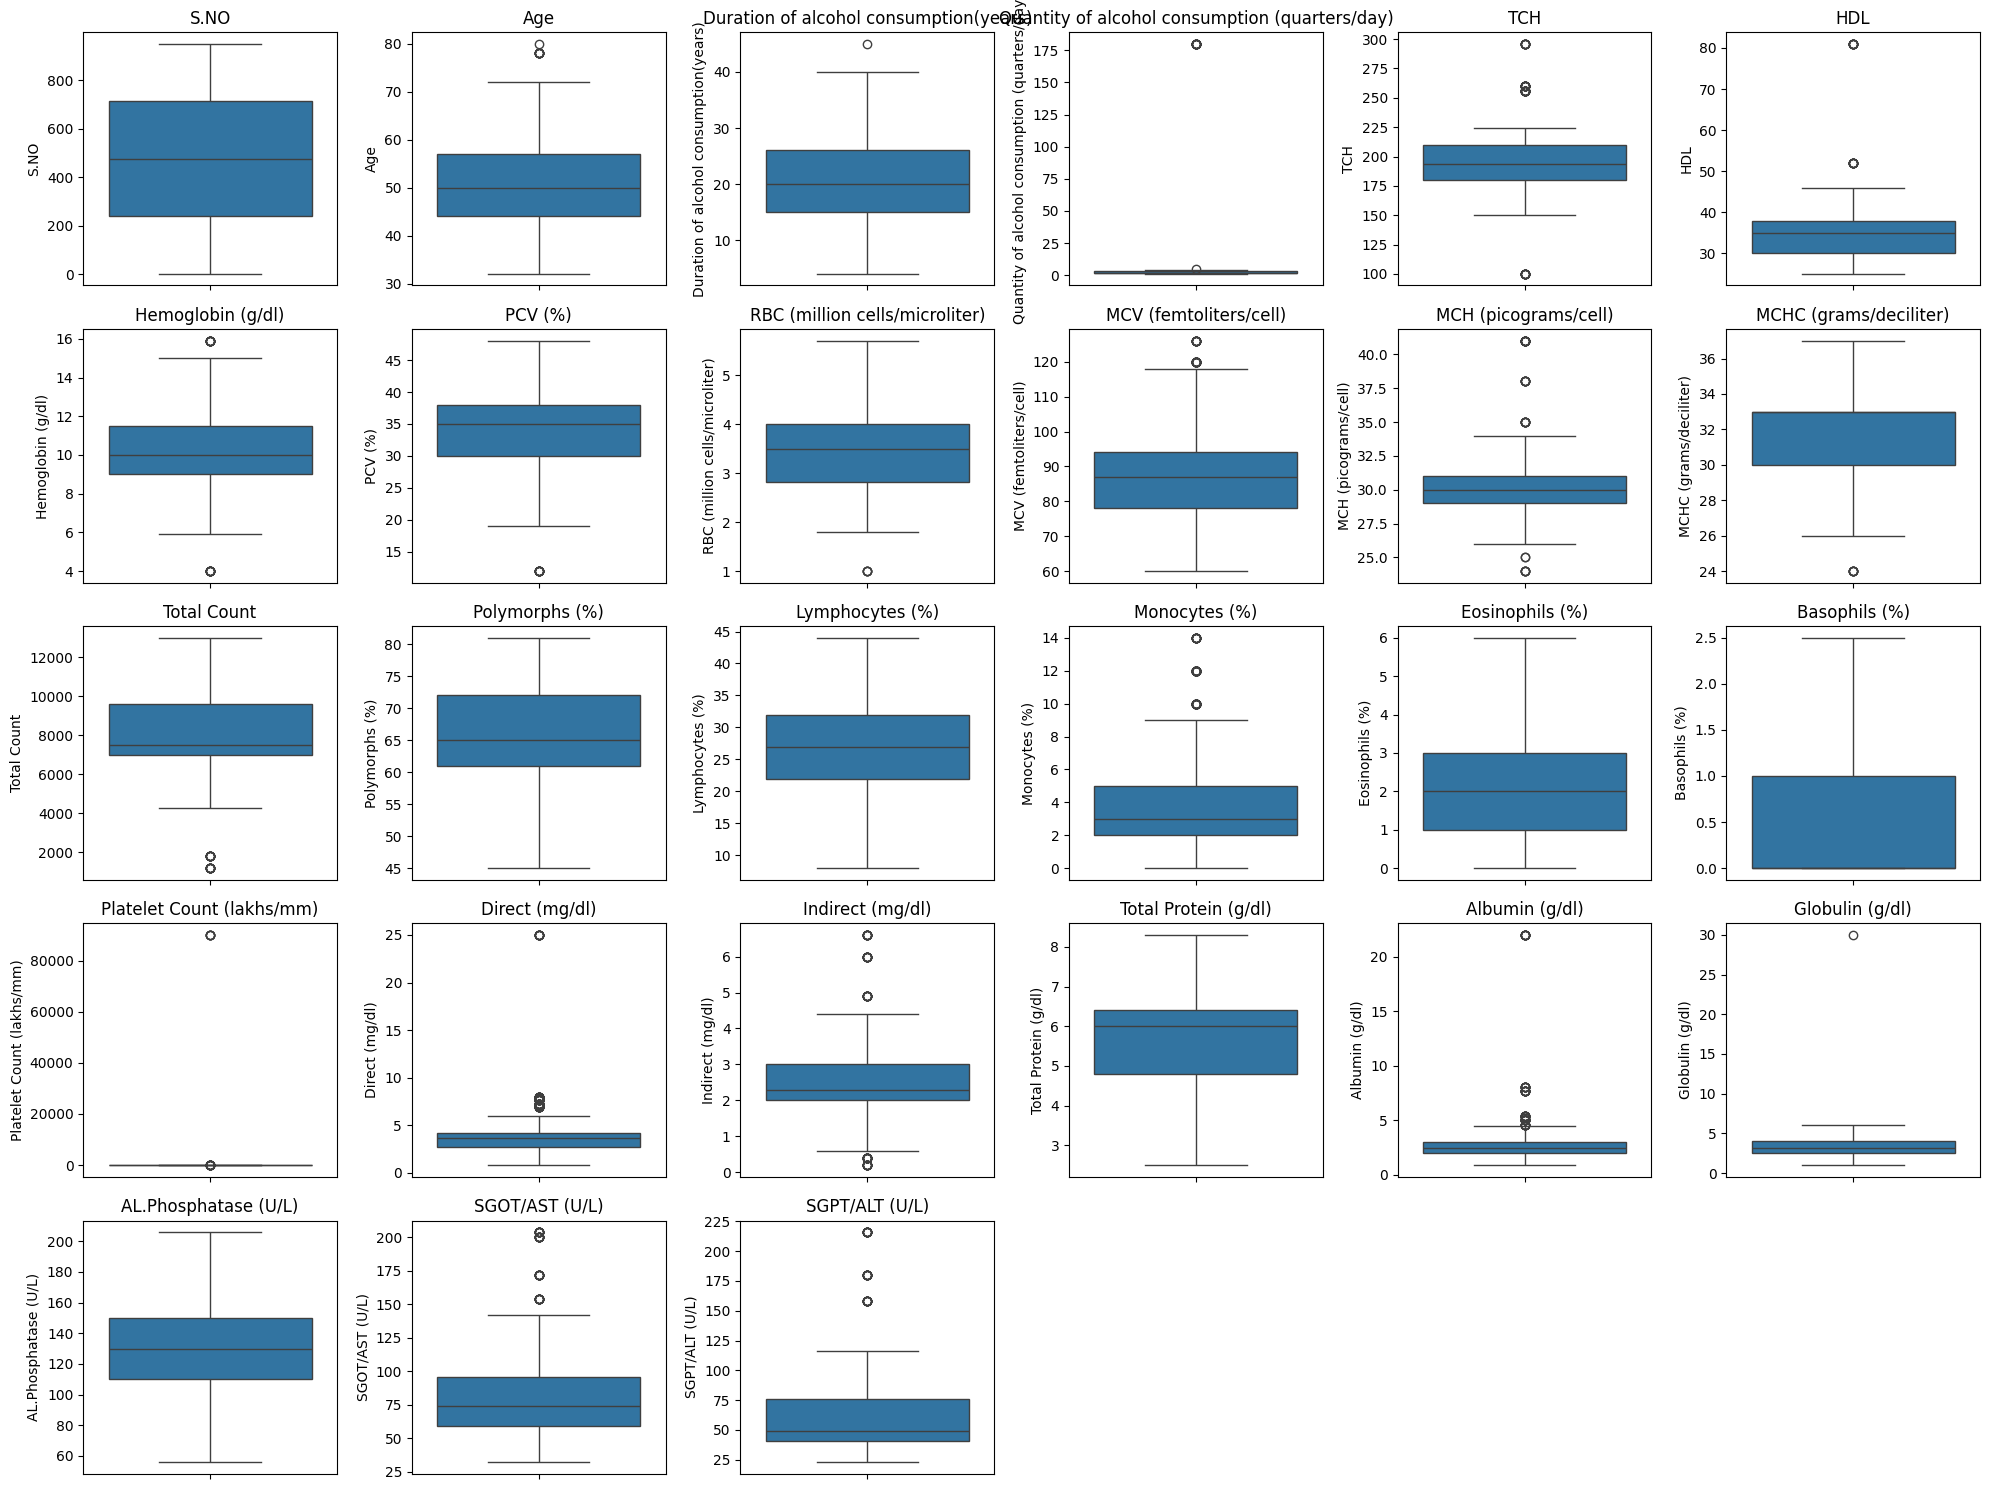

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 6, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

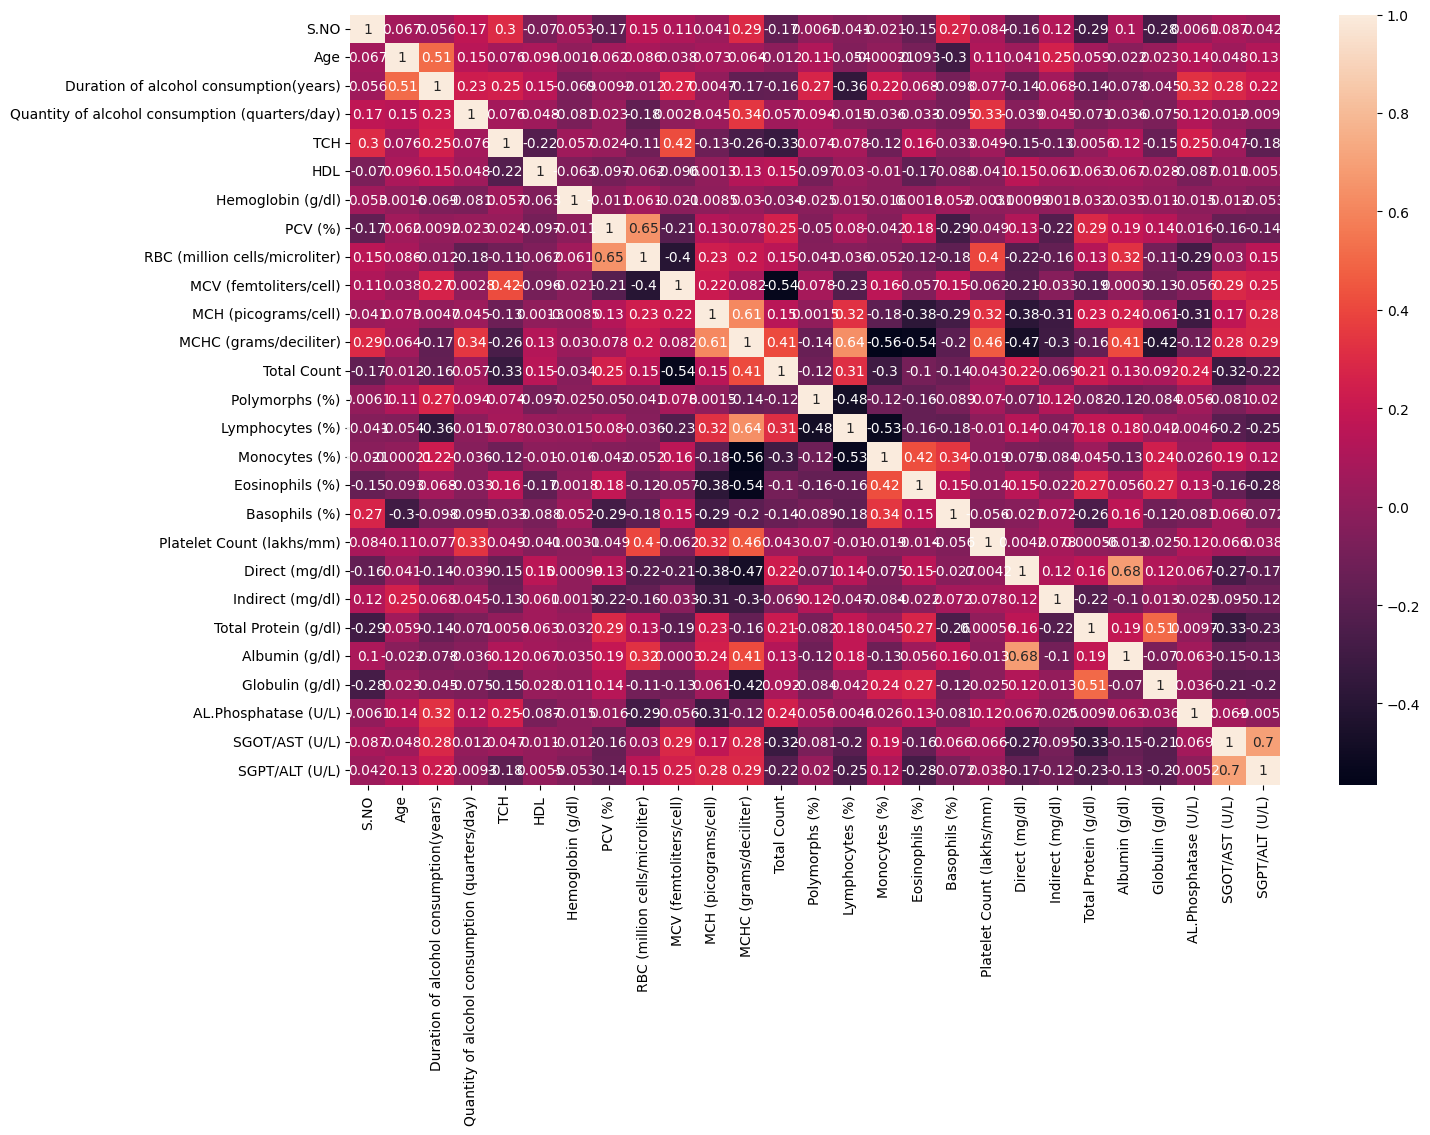

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
936,937,72,female,urban,4,3,branded liquor,negative,negative,NO,...,1.0,2.0,5.3,4.2,3.5,NaN,110.0,110,70,no
290,291,52,male,urban,12,1,country liquor,negative,negative,YES,...,4.0,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES
544,545,38,male,urban,24,3,both,negative,negative,NO,...,2.0,1.0,4.0,2.0,2.0,01:01:00,100.0,94,106,YES
275,276,60,female,rural,10,3,both,negative,negative,YES,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
109,110,50,male,rural,15,1,country liquor,negative,negative,YES,...,6.0,2.0,7.0,3.0,4.0,NaN,120.0,79,84,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,male,rural,20,2,country liquor,negative,negative,YES,...,7.9,3.9,5.0,2.0,3.0,NaN,110.0,86,79,YES
270,271,60,female,rural,10,3,both,Positive,Positive,YES,...,7.6,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES
860,861,57,male,rural,25,3,both,Positive,Positive,YES,...,3.7,NaN,NaN,2.0,4.5,0.44,157.0,88,56,YES
435,436,55,female,rural,20,2,country liquor,Positive,Positive,YES,...,2.5,1.5,5.0,2.5,2.5,NaN,152.0,172,180,YES


In [ ]:
x_test

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
199,200,44,male,NaN,25,3,both,Positive,Positive,YES,...,2.5,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES
929,930,50,male,NaN,20,3,both,negative,negative,NO,...,1.2,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no
693,694,42,male,NaN,22,3,both,Positive,Positive,YES,...,3.0,3.0,3.0,1.2,1.8,02:03:00,184.0,72,40,YES
798,799,51,male,rural,25,2,country liquor,negative,negative,YES,...,25.0,2.0,4.8,22.0,2.6,NaN,145.0,64,43,YES
874,875,38,male,rural,10,3,both,Positive,Positive,YES,...,3.2,2.0,NaN,2.1,4.3,0.48,130.0,56,48,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,70,male,rural,40,1,both,Positive,Positive,NO,...,2.2,2.6,5.1,1.6,3.5,01:02:00,134.0,56,24,YES
33,34,62,male,rural,40,2,both,negative,negative,YES,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
31,32,62,male,rural,40,2,both,negative,negative,YES,...,3.4,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES
710,711,46,male,rural,18,2,country liquor,negative,negative,YES,...,1.1,0.9,6.0,4.0,2.0,02:01:00,180.0,84,96,YES


In [ ]:
y_train

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
936,no
290,YES
544,YES
275,YES
109,YES
...,...
106,YES
270,YES
860,YES
435,YES


In [ ]:
y_test

,Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
199,YES
929,YES
693,YES
798,YES
874,YES
...,...
598,YES
33,YES
31,YES
710,YES


In [ ]:
print(x_train.dtypes)

S.NO                                                int64
Age                                                 int64
Gender                                             object
Place(location where the patient lives)            object
Duration of alcohol consumption(years)              int64
Quantity of alcohol consumption (quarters/day)      int64
Type of alcohol consumed                           object
Hepatitis B infection                              object
Hepatitis C infection                              object
Diabetes Result                                    object
Blood pressure (mmhg)                              object
Obesity                                            object
Family history of cirrhosis/ hereditary            object
TCH                                               float64
TG                                                 object
LDL                                                object
HDL                                               float64
Hemoglobin (g/

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['Gender', 'Place(location where the patient lives)', 'Type of alcohol consumed']
le = LabelEncoder()
for col in label_cols:
    x_train.loc[:, col] = le.fit_transform(x_train[col].astype(str).str.strip())

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
x_train = x_train.fillna(x_train.mean())

In [ ]:
print(x_train.isna().sum()[x_train.isna().sum() > 0])

Series([], dtype: int64)


In [ ]:
x_train = x_train.fillna(0)

In [ ]:
x_train['__target__'] = y_train
x_train.dropna(inplace=True)

# Split back the features and target
y_train = x_train['__target__']
x_train = x_train.drop(columns='__target__')

In [ ]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

x_train = x_train.copy()
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_cols:
    x_train[col] = le.fit_transform(x_train[col].astype(str).str.strip())
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_train = x_train.fillna(x_train.mean(numeric_only=True))
x_train = x_train.clip(-1e10, 1e10)
x_train = x_train.astype(float)
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

if y_train.dtype == object or y_train.dtype.name == 'category':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train.astype(str))

y_train = pd.Series(y_train)
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train = y_train.fillna(y_train.mode()[0])
y_train = y_train.astype(int)
assert not np.isnan(x_train.values).any()
assert not np.isinf(x_train.values).any()
assert not np.isnan(y_train.values).any()
assert not np.isinf(y_train.values).any()

nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [ ]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
936,937.0,72.0,0.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,...,1.0,2.000000,5.300000,4.2,3.5,0.896233,110.0,110.0,70.0,0.0
290,291.0,52.0,1.0,3.0,12.0,1.0,2.0,0.0,0.0,0.0,...,4.0,3.000000,6.000000,3.0,4.0,0.750000,110.0,58.0,35.0,0.0
544,545.0,38.0,1.0,3.0,24.0,3.0,0.0,0.0,0.0,0.0,...,2.0,1.000000,4.000000,2.0,2.0,0.896233,100.0,94.0,106.0,0.0
275,276.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.800000,6.400000,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
109,110.0,50.0,1.0,2.0,15.0,1.0,2.0,0.0,0.0,0.0,...,6.0,2.000000,7.000000,3.0,4.0,0.896233,120.0,79.0,84.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72.0,40.0,1.0,3.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.000000,6.000000,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
106,107.0,54.0,1.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,7.9,3.900000,5.000000,2.0,3.0,0.896233,110.0,86.0,79.0,0.0
270,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.800000,6.400000,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
860,861.0,57.0,1.0,2.0,25.0,3.0,0.0,0.0,0.0,0.0,...,3.7,2.439972,5.598174,2.0,4.5,0.440000,157.0,88.0,56.0,0.0


In [ ]:
y_train

,0
0,1
1,0
2,0
3,0
4,0
...,...
711,0
712,0
713,0
714,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
936,937.0,72.0,0.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,...,1.0,2.000000,5.300000,4.2,3.5,0.896233,110.0,110.0,70.0,0.0
290,291.0,52.0,1.0,3.0,12.0,1.0,2.0,0.0,0.0,0.0,...,4.0,3.000000,6.000000,3.0,4.0,0.750000,110.0,58.0,35.0,0.0
544,545.0,38.0,1.0,3.0,24.0,3.0,0.0,0.0,0.0,0.0,...,2.0,1.000000,4.000000,2.0,2.0,0.896233,100.0,94.0,106.0,0.0
275,276.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.800000,6.400000,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
109,110.0,50.0,1.0,2.0,15.0,1.0,2.0,0.0,0.0,0.0,...,6.0,2.000000,7.000000,3.0,4.0,0.896233,120.0,79.0,84.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72.0,40.0,1.0,3.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.000000,6.000000,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
106,107.0,54.0,1.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,7.9,3.900000,5.000000,2.0,3.0,0.896233,110.0,86.0,79.0,0.0
270,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.800000,6.400000,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
860,861.0,57.0,1.0,2.0,25.0,3.0,0.0,0.0,0.0,0.0,...,3.7,2.439972,5.598174,2.0,4.5,0.440000,157.0,88.0,56.0,0.0


In [ ]:
y_train

,0
0,1
1,0
2,0
3,0
4,0
...,...
711,0
712,0
713,0
714,0


In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
logistic = log.fit(x_train, y_train)


In [ ]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
936,937.0,72.0,0.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0,...,1.0,2.000000,5.300000,4.2,3.5,0.896233,110.0,110.0,70.0,0.0
290,291.0,52.0,1.0,3.0,12.0,1.0,2.0,0.0,0.0,0.0,...,4.0,3.000000,6.000000,3.0,4.0,0.750000,110.0,58.0,35.0,0.0
544,545.0,38.0,1.0,3.0,24.0,3.0,0.0,0.0,0.0,0.0,...,2.0,1.000000,4.000000,2.0,2.0,0.896233,100.0,94.0,106.0,0.0
275,276.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.800000,6.400000,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
109,110.0,50.0,1.0,2.0,15.0,1.0,2.0,0.0,0.0,0.0,...,6.0,2.000000,7.000000,3.0,4.0,0.896233,120.0,79.0,84.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72.0,40.0,1.0,3.0,10.0,1.0,2.0,0.0,0.0,0.0,...,8.0,2.000000,6.000000,1.2,4.8,0.896233,108.0,79.0,56.0,0.0
106,107.0,54.0,1.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,...,7.9,3.900000,5.000000,2.0,3.0,0.896233,110.0,86.0,79.0,0.0
270,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0,...,7.6,1.800000,6.400000,2.9,3.7,0.870000,144.0,54.0,41.0,0.0
860,861.0,57.0,1.0,2.0,25.0,3.0,0.0,0.0,0.0,0.0,...,3.7,2.439972,5.598174,2.0,4.5,0.440000,157.0,88.0,56.0,0.0


In [ ]:
y_train

,0
0,1
1,0
2,0
3,0
4,0
...,...
711,0
712,0
713,0
714,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print("x_Train", x_train)
print("y_Train", y_train)

x_Train       S.NO   Age  Gender  Place(location where the patient lives)  \
936  937.0  72.0     0.0                                      3.0   
290  291.0  52.0     1.0                                      3.0   
544  545.0  38.0     1.0                                      3.0   
275  276.0  60.0     0.0                                      2.0   
109  110.0  50.0     1.0                                      2.0   
..     ...   ...     ...                                      ...   
71    72.0  40.0     1.0                                      3.0   
106  107.0  54.0     1.0                                      2.0   
270  271.0  60.0     0.0                                      2.0   
860  861.0  57.0     1.0                                      2.0   
435  436.0  55.0     0.0                                      2.0   

     Duration of alcohol consumption(years)  \
936                                     4.0   
290                                    12.0   
544                   

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
k = np.random.randint(1, 50, 60)

In [ ]:
params = {'n_neighbors': k}

In [ ]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), params, n_iter=5, cv=5, n_jobs=1, verbose=0)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=1,
                   param_distributions={'n_neighbors': array([34,  1,  2,  4, 20, 24, 38, 31, 44, 17, 20, 16, 39, 27, 48, 36, 31,
       47,  2, 10,  4, 29, 41, 10, 43, 48, 29, 37,  6, 27, 36,  1, 27, 48,
        6, 29, 30,  7, 35, 27, 10, 40,  1, 48, 25,  2, 41, 20,  7,  2, 39,
       21, 28, 25, 27, 13, 39, 46, 36, 37])})

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

if y.dtype == object or y.dtype.name == 'category':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y.astype(str))

x = x.copy()
for col in x.select_dtypes(include=['object', 'category']).columns:
    x[col] = x[col].astype(str).str.strip()
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(x.mean(numeric_only=True), inplace=True)

assert not np.isnan(x.values).any()
assert not np.isinf(x.values).any()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

k = np.random.randint(1, 50, 60)
params = {'n_neighbors': k}

random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=params,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    verbose=0
)

random_search.fit(x_train, y_train)

print('train_score -', random_search.score(x_train, y_train))
print('test_score  -', random_search.score(x_test, y_test))



train_score - 0.9447368421052632
test_score  - 0.9473684210526315
